## Setting up the folder structure

In [1]:
!ls -l /root/.ssh/

ls: cannot access '/root/.ssh/': No such file or directory


In [2]:
!mkdir -p /root/.ssh/

In [3]:
!ls -l /root/.ssh/

total 0


In [4]:
!cp /content/drive/MyDrive/deploy_keys/id_ed25519* /root/.ssh/

In [5]:
# Add github as trusted entity
!ssh-keyscan github.com >> /root/.ssh/known_hosts

# github.com:22 SSH-2.0-babeld-05989c77
# github.com:22 SSH-2.0-babeld-05989c77
# github.com:22 SSH-2.0-babeld-05989c77
# github.com:22 SSH-2.0-babeld-05989c77
# github.com:22 SSH-2.0-babeld-05989c77


In [6]:
!ssh -T git@github.com

Hi MysticShadow427/homo-mex-2024! You've successfully authenticated, but GitHub does not provide shell access.


In [7]:
!git clone git@github.com:MysticShadow427/homo-mex-2024.git

Cloning into 'homo-mex-2024'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 19 (delta 2), reused 18 (delta 1), pack-reused 0
Receiving objects: 100% (19/19), 740.34 KiB | 14.81 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [8]:
!ls -l /content

total 12
drwx------ 5 root root 4096 Mar 26 09:18 drive
drwxr-xr-x 5 root root 4096 Mar 26 09:18 homo-mex-2024
drwxr-xr-x 1 root root 4096 Mar 22 13:21 sample_data


## Importing Packages

In [9]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from transformers import AutoTokenizer

## EDA Track - 1

In [10]:
df = pd.read_csv('/content/homo-mex-2024/data/public_data_dev_phase/track_1_dev.csv')
df

,content,label
0,"Me quise ligar a una chava ayer y no me pelo, ...",P
1,"@papaya_rockera eres un puñal, papayita.",P
2,Magnate ofrece 130 mdd al hombre que conquiste...,P
3,Los trolebuses del desgobierno de @EpN son idi...,P
4,"En época de Hitler no se decía ""eres gay"" y, s...",P
...,...,...
6995,(Igual y cachamos a un transformer con este tu...,P
6996,Acabé una temporada de Rupaul's Drag Race en n...,P
6997,@ArielURosas @nuxsilva Ayuññ. pos es que me di...,P
6998,"@LaTortilleriaQ si vamos a hacer un vagón ""seg...",P


In [11]:
df['label'].value_counts()

NP    4360
NR    1778
P      862
Name: label, dtype: int64

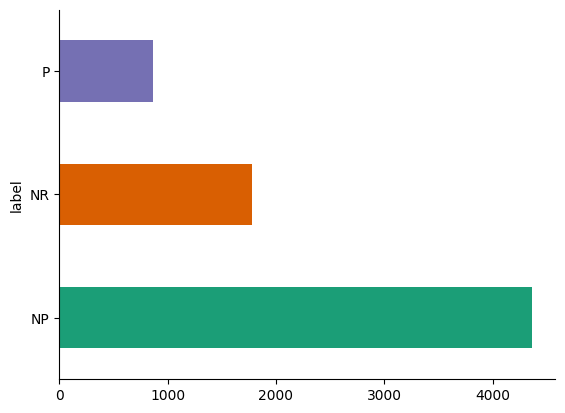

In [12]:
df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

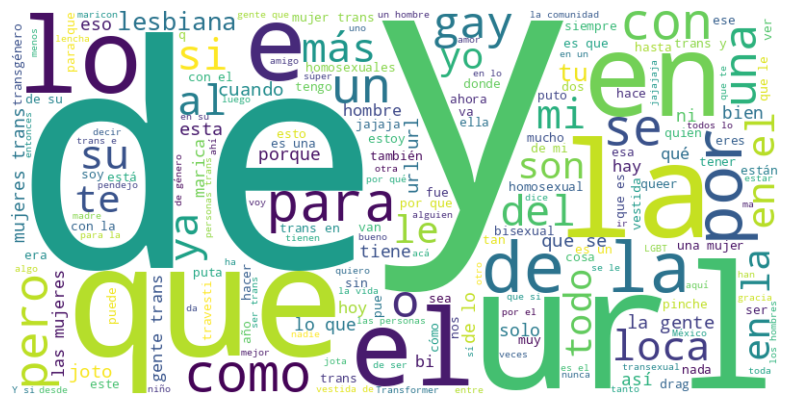

In [13]:
text_combined = ' '.join(df['content'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [14]:
df_new = df.copy()

In [15]:
# Function to remove pattern occurrences of '@Username' from a sentence
def remove_pattern(sentence):
    return re.sub(r'@[\w]+', '', sentence)

df_new['content_cleaned'] = df_new['content'].apply(remove_pattern)
df_new = df_new.drop('content',axis = 1)
df_new

,label,content_cleaned
0,P,"Me quise ligar a una chava ayer y no me pelo, ..."
1,P,"eres un puñal, papayita."
2,P,Magnate ofrece 130 mdd al hombre que conquiste...
3,P,Los trolebuses del desgobierno de son idiotas...
4,P,"En época de Hitler no se decía ""eres gay"" y, s..."
...,...,...
6995,P,(Igual y cachamos a un transformer con este tu...
6996,P,Acabé una temporada de Rupaul's Drag Race en n...
6997,P,"Ayuññ. pos es que me dicen: OpH, SEND NERDEZ..."
6998,P,"si vamos a hacer un vagón ""seguro"" que incluy..."


In [16]:
# Function to remove numbers and URLs from a sentence
def remove_numbers_and_urls(sentence):
    # Remove numbers
    sentence = re.sub(r'\d+', '', sentence)
    # Remove URLs
    sentence = re.sub(r'http[s]?://\S+', '', sentence)
    return sentence

df_new['content_cleaned'] = df_new['content_cleaned'].apply(remove_numbers_and_urls)
df_new

,label,content_cleaned
0,P,"Me quise ligar a una chava ayer y no me pelo, ..."
1,P,"eres un puñal, papayita."
2,P,Magnate ofrece mdd al hombre que conquiste a ...
3,P,Los trolebuses del desgobierno de son idiotas...
4,P,"En época de Hitler no se decía ""eres gay"" y, s..."
...,...,...
6995,P,(Igual y cachamos a un transformer con este tu...
6996,P,Acabé una temporada de Rupaul's Drag Race en n...
6997,P,"Ayuññ. pos es que me dicen: OpH, SEND NERDEZ..."
6998,P,"si vamos a hacer un vagón ""seguro"" que incluy..."


In [17]:
# Function to remove characters except specified punctuation marks and spaces
def remove_chars_except_punctuations(sentence):
    # Keep words, '?', '!', ',', '.', and spaces
    sentence = re.sub(r'[^\w\s?!,.]', '', sentence)
    return sentence

# Apply the function to each sentence in the 'text' column
df_new['content_cleaned'] = df_new['content_cleaned'].apply(remove_chars_except_punctuations)
df_new


,label,content_cleaned
0,P,"Me quise ligar a una chava ayer y no me pelo, ..."
1,P,"eres un puñal, papayita."
2,P,Magnate ofrece mdd al hombre que conquiste a ...
3,P,Los trolebuses del desgobierno de son idiotas...
4,P,"En época de Hitler no se decía eres gay y, sí ..."
...,...,...
6995,P,Igual y cachamos a un transformer con este tui...
6996,P,Acabé una temporada de Rupauls Drag Race en na...
6997,P,"Ayuññ. pos es que me dicen OpH, SEND NERDEZ ..."
6998,P,si vamos a hacer un vagón seguro que incluya ...


In [18]:
# Label to index
tags = df_new.label.unique().tolist()
num_classes = len(tags)
class_to_index = {tag: i for i, tag in enumerate(tags)}
class_to_index

{'P': 0, 'NP': 1, 'NR': 2}

In [19]:
# Label to index
tags = df_new.label.unique().tolist()
num_classes = len(tags)
class_to_index = {tag: i for i, tag in enumerate(tags)}
class_to_index
# Encode labels
df_new["label"] = df_new["label"].map(class_to_index)
df_new

,label,content_cleaned
0,0,"Me quise ligar a una chava ayer y no me pelo, ..."
1,0,"eres un puñal, papayita."
2,0,Magnate ofrece mdd al hombre que conquiste a ...
3,0,Los trolebuses del desgobierno de son idiotas...
4,0,"En época de Hitler no se decía eres gay y, sí ..."
...,...,...
6995,0,Igual y cachamos a un transformer con este tui...
6996,0,Acabé una temporada de Rupauls Drag Race en na...
6997,0,"Ayuññ. pos es que me dicen OpH, SEND NERDEZ ..."
6998,0,si vamos a hacer un vagón seguro que incluya ...


In [20]:
def decode(indices, index_to_class):
    return [index_to_class[index] for index in indices]

In [22]:
index_to_class = {v:k for k, v in class_to_index.items()}
index_to_class

{0: 'P', 1: 'NP', 2: 'NR'}

In [24]:
decode(df_new.head()["label"].values, index_to_class=index_to_class)

['P', 'P', 'P', 'P', 'P']

In [25]:
checkpoint = 'dccuchile/bert-base-spanish-wwm-uncased'

In [26]:
tokenizer = AutoTokenizer.from_pretrained(checkpoint, return_dict=False)
text = df_new.iloc[13]['content_cleaned']
encoded_inputs = tokenizer([text], return_tensors="np", padding="longest")  # pad to longest item in batch
print ("input_ids:", encoded_inputs["input_ids"])
print ("attention_mask:", encoded_inputs["attention_mask"])
print (tokenizer.decode(encoded_inputs["input_ids"][0]))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/310 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/650 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/486k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/134 [00:00<?, ?B/s]

input_ids: [[    4  1076  1041  1311 23546 23076  1886  1059  1076  1041 19084 30959
   1151 16106  1067  2305  1059  1318 23546 25617  1018  1059  2645 30962
      5]]
attention_mask: [[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
[CLS] por que hay puros putos ahí? por que lloran como señoritas los hombres? son puros puñales? url [SEP]


In [31]:
def tokenize(batch):
    tokenizer = AutoTokenizer.from_pretrained(checkpoint, return_dict=False)
    encoded_inputs = tokenizer(batch["content_cleaned"].tolist(), return_tensors="np", padding="longest")
    return dict(ids=encoded_inputs["input_ids"], masks=encoded_inputs["attention_mask"], targets=np.array(batch["label"]))

In [93]:
df_new.head(13)

,label,content_cleaned
0,0,"Me quise ligar a una chava ayer y no me pelo, ..."
1,0,"eres un puñal, papayita."
2,0,Magnate ofrece mdd al hombre que conquiste a ...
3,0,Los trolebuses del desgobierno de son idiotas...
4,0,"En época de Hitler no se decía eres gay y, sí ..."
5,0,Estaban unos vatos gays enfrente de mi y de be...
6,0,Lo que siento por esta bola de inútiles homose...
7,0,"Nononono, la ley trans código penal na dice q..."
8,0,"Acá hay uno del nana, de hecho un twitter ..."
9,0,"A donde vas a estas horas, hijo? Al table mamá..."


In [111]:
# Tokenization
tokenize(df_new.iloc[0:0+32])

{'ids': array([[    4,  1094,  7325, ...,     1,     1,     1],
        [    4,  1669,  1044, ...,     1,     1,     1],
        [    4, 21843,  1043, ...,     1,     1,     1],
        ...,
        [    4,  1028,  1009, ...,     1,     1,     1],
        [    4,  1252,  1054, ...,     1,     1,     1],
        [    4, 11106,  6396, ...,     1,     1,     1]]),
 'masks': array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]]),
 'targets': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}

In [33]:
import torch
from torch import nn
import random
def set_seeds(seed=42):
    """Set seeds for reproducibility."""
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    eval("setattr(torch.backends.cudnn, 'deterministic', True)")
    eval("setattr(torch.backends.cudnn, 'benchmark', False)")
    os.environ["PYTHONHASHSEED"] = str(seed)

In [34]:
from transformers import AutoModel
llm = AutoModel.from_pretrained(checkpoint, return_dict=False)
embedding_dim = llm.config.hidden_size
print(f"Embedding Dimension {embedding_dim}")

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


768

In [92]:
text = df_new.iloc[13]['content_cleaned']
text

'por que hay puros pUTOS ahí ? \npor que lloran como señoritas los hombres ? \nSon puros puñales ?  url'

In [35]:
text = df_new.iloc[13]['content_cleaned']
batch = tokenizer([text], return_tensors="np", padding="longest")
batch = {k:torch.tensor(v) for k,v in batch.items()}  # convert to torch tensors
seq, pool = llm(input_ids=batch["input_ids"], attention_mask=batch["attention_mask"])
np.shape(seq), np.shape(pool)

(torch.Size([1, 25, 768]), torch.Size([1, 768]))

In [65]:
batch

{'input_ids': tensor([[    4,  1076,  1041,  1311, 23546, 23076,  1886,  1059,  1076,  1041,
          19084, 30959,  1151, 16106,  1067,  2305,  1059,  1318, 23546, 25617,
           1018,  1059,  2645, 30962,     5]]),
 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0]]),
 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1]])}

In [36]:
import torch.nn.functional as F

class FinetunedLLM(nn.Module):
    def __init__(self, llm, dropout_p, embedding_dim, num_classes):
        super(FinetunedLLM, self).__init__()
        self.llm = llm
        # self.llm.eval()  # Freezes the LLM parameters
        # for param in self.llm.parameters():
        #     param.requires_grad = False  # Freeze the parameters of the LLM
        self.dropout = torch.nn.Dropout(dropout_p)
        self.fc1 = torch.nn.Linear(embedding_dim, num_classes)

    def forward(self, batch):
        ids, masks = batch["ids"], batch["masks"]
        # with torch.no_grad():  # Ensure no gradient is computed for llm
        #     seq, pool = self.llm(input_ids=ids, attention_mask=masks)
        seq, pool = self.llm(input_ids=ids, attention_mask=masks)
        z = self.dropout(pool)
        z = self.fc1(z)
        return z

    @torch.inference_mode()
    def predict(self, batch):
        self.eval()
        z = self(batch)
        y_pred = torch.argmax(z, dim=1).cpu().numpy()
        return y_pred

    @torch.inference_mode()
    def predict_proba(self, batch):
        self.eval()
        z = self(batch)
        y_probs = F.softmax(z).cpu().numpy()
        return y_probs

In [37]:
model = FinetunedLLM(llm=llm, dropout_p=0.1, embedding_dim=embedding_dim, num_classes=num_classes)
print (model.named_parameters)

<bound method Module.named_parameters of FinetunedLLM(
  (llm): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(31002, 768, padding_idx=1)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): Layer

In [48]:
model.llm.requires_grad = False
count = 0

for param in model.llm.parameters():
    if param.requires_grad == True:
        count += 1
count

199

In [52]:
def pad_array(arr, dtype=np.int32):
    max_len = max(len(row) for row in arr)
    padded_arr = np.zeros((arr.shape[0], max_len), dtype=dtype)
    for i, row in enumerate(arr):
        padded_arr[i][:len(row)] = row
    return padded_arr

In [42]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [113]:
def collate_fn(batch):
    batch["ids"] = pad_array(batch["ids"])
    batch["masks"] = pad_array(batch["masks"])
    dtypes = {"ids": torch.int32, "masks": torch.int32, "targets": torch.int64}
    tensor_batch = {}
    for key, array in batch.items():
        tensor_batch[key] = torch.as_tensor(array, dtype=dtypes[key], device=device)
    return tensor_batch

In [114]:
# Define batch size
batch_size = 32

# Iterate over the DataFrame in batches
for i in range(0, len(df_new), batch_size):
    batch = df_new.iloc[i:i+batch_size]
    batch = tokenize(batch)
    batch = collate_fn(batch)
    print(batch)
    break

{'ids': tensor([[    4,  1094,  7325,  ...,     1,     1,     1],
        [    4,  1669,  1044,  ...,     1,     1,     1],
        [    4, 21843,  1043,  ...,     1,     1,     1],
        ...,
        [    4,  1028,  1009,  ...,     1,     1,     1],
        [    4,  1252,  1054,  ...,     1,     1,     1],
        [    4, 11106,  6396,  ...,     1,     1,     1]], dtype=torch.int32), 'masks': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]], dtype=torch.int32), 'targets': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])}


In [105]:
BATCH_SIZE = 32
EPOCHS = 5
LEARNING_RATE = 2e-5

- https://mccormickml.com/2019/07/22/BERT-fine-tuning/#33-tokenize-dataset
-  https://curiousily.com/posts/sentiment-analysis-with-bert-and-hugging-face-using-pytorch-and-python/

In [106]:
optimizer = AdamW(params = model.parameters(),lr = )

TypeError: new(): invalid data type 'str'

## EDA Track-3

In [16]:
df = pd.read_csv('/content/homo-mex-2024/data/public_data_dev_phase/track_3_dev.csv')
df

,lyric,label
0,Nada tienen de especial\nDos mujeres que se da...,NP
1,Está canción fue basada en la\nExperiencia que...,P
2,No tengo motores a reacción\nNunca he querido ...,NP
3,"Siempre, como ya es costumbre día a día es igu...",NP
4,[Intro]\nAlex Mesa y Duver\nVamos con ese bajo...,P
...,...,...
595,"[Verso 1: Babo]\nTiren mientras el mundo gire,...",P
596,"Se pone triste al escuchar esta canción\nAy, m...",P
597,[Intro]\n¡Yas!\n[Verso 1]\nEn la calle caminan...,NP
598,Wacha\nUn saludo pa el DHA\nQue le queremos de...,P


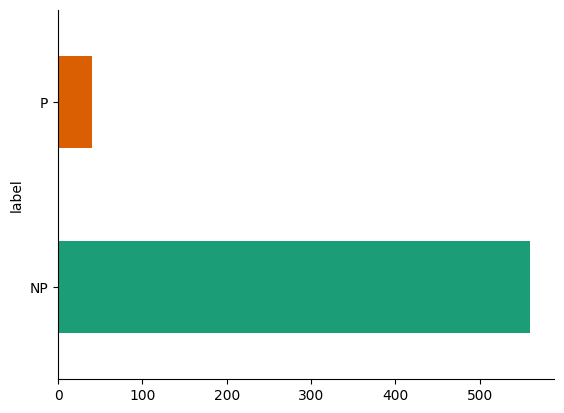

In [18]:
df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [17]:
df['label'].value_counts()

NP    560
P      40
Name: label, dtype: int64

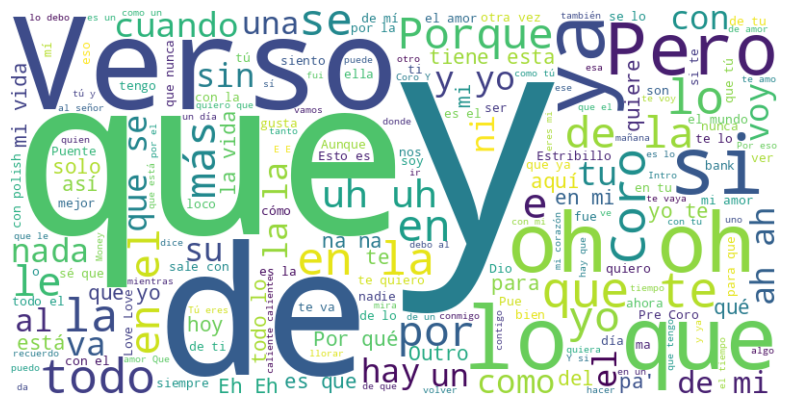

In [18]:
text_combined = ' '.join(df['lyric'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Notes

- Find appropriate pretrained Tokenizer and hence model too.
- We can use our own custom transformer encoder and train our own tokenizer using the data available but keep this as a last option.
- Preprocess (traditional techniques - stemming,url removal,etc) ?
    - yeah but these are for english, for this mexican spanish ig we can remove any numbers and urls but keep the characters like exclaimation marks,question marks,etc
    - first of all remove all the `@Username`, `numbers`,`characters exept the punctuation marks`.
- Dataset highly imbalanced (no need to augment on the dev set but if training set is also imbalanced then we need some augmentation strategies).